In [6]:
from directories import *
import os, shutil


all_masks_directory = os.path.join(base_directory, 'allmasks')
for oldname in os.listdir(all_masks_directory):
    olddirection = os.path.join(all_masks_directory, oldname)
    splitname = oldname.split('_');
    newname = splitname[0] + '_' + splitname[1] + '.png'
    newdirection = os.path.join(all_masks_directory, newname)
    os.rename(olddirection, newdirection)


In [4]:
recycle = os.path.join(base_directory, 'masks')

images_directory = test_images_directory
masks_directory = test_masks_directory
for name in os.listdir(masks_directory):
    if not name in allimagesnames:
        mask_direction = os.path.join(masks_directory, name)
        new_direction = os.path.join(recycle, name)
        shutil.copy(mask_direction, new_direction)
    else:
    #if name in allimagesnames:
        image_direction = os.path.join(all_images_directory, name)
        new_direction = os.path.join(images_directory, name)
        shutil.copy(image_direction, new_direction)



In [6]:
import requests
def download_image(name, directory):
    id, _ = name.split('.');
    url = "https://api.isic-archive.com/api/v2/images/" + id 
    json = requests.get(url, timeout=10).json()
    url = json['files']['full']['url']
    
    plot = requests.get(url,timeout=10)
    image = plot.content
    print(directory)
    with open(directory, 'wb') as file:
        file.write(image)

In [7]:

name = 'ISIC_0015168.png'
directory = os.path.join(base_directory, name)
download_image(name, directory)

dataset/isic_2017/ISIC_0015168.png


In [15]:
import requests
recycle = os.path.join(base_directory, 'masks')
recycle_images = os.path.join(base_directory, 'images')
for name in os.listdir(recycle):
    directory = os.path.join(recycle_images, name)
    if os.path.exists(directory): continue

    try:
        id, _ = name.split('.');
        url = "https://api.isic-archive.com/api/v2/images/" + id 
        json = requests.get(url, timeout=10).json()
        url = json['files']['full']['url']
        
        plot = requests.get(url,timeout=10)
        image = plot.content
        print(directory)
        with open(directory, 'wb') as file:
            file.write(image)
    except:
        print("Error:", directory)

dataset/images/ISIC_0014031.png


In [7]:

images_directory = os.path.join(base_directory, 'images')
masks_directory = os.path.join(base_directory, 'masks')
allmasks = os.listdir(all_masks_directory)
for name in os.listdir(images_directory):
    if name in allmasks:
        image_direction = os.path.join(all_masks_directory, name)
        new_direction = os.path.join(masks_directory, name)
        shutil.copy(image_direction, new_direction)

Text(0.5, 1.0, 'Tanh function')

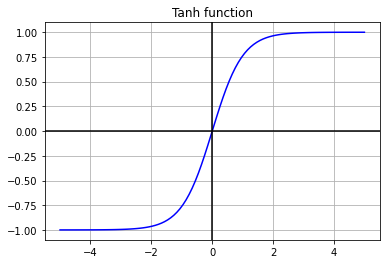

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x): return 1 / (1 + np.e ** (-x))
def relu(x): return max(0, x)
def softplus(x): return np.log(1 + np.e ** x)
def tanh(x): (np.e ** (2 * x) - 1) / (np.e ** (2 * x) + 1)

funs = {
    'SIGMOID': sigmoid,
    'ReLU': relu,
    'Softplus': softplus,
    'Tanh': np.tanh
}

name = 'Tanh'
x = np.linspace(-5, 5, 100)
f = funs[name]

y = [f(i) for i in x]


fig, ax = plt.subplots()
ax.plot(x, y, 'b')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title(f'{name} function')

In [11]:
import os
from PIL import Image, ImageOps

def rotate_image(img):
    out_90 = img.rotate(90, expand=True)
    out_180 = img.rotate(180, expand=True)
    out_270 = img.rotate(270, expand=True)
    return out_90, out_180, out_270

def flip_image(img):	
    flip_vertical = ImageOps.flip(img)        
    flip_horizontal = ImageOps.mirror(img)   
    return flip_horizontal, flip_vertical

def augment(incoming_path, destiny_path):
    for name in os.listdir(incoming_path):
        original = os.path.join(incoming_path, name)

        print(name)
        img = Image.open(original)
        #out_90, out_180, out_270 = rotate_image(img)
        #flip_horizontal, flip_vertical = flip_image(img)

        name, _ = name.split('.')
        img.save(os.path.join(destiny_path, f'{name}.png'))
        #out_90.save(os.path.join(destiny_path, f'{name}_90.png'))
        #out_180.save(os.path.join(destiny_path, f'{name}_180.png'))
        #out_270.save(os.path.join(destiny_path, f'{name}_270.png'))
        #flip_horizontal.save(os.path.join(destiny_path, f'{name}_horizontal.png'))
        #flip_vertical.save(os.path.join(destiny_path, f'{name}_vertical.png'))


In [3]:
import keras, tensorflow, PIL, cv2, numpy, matplotlib
print(keras.__version__, tensorflow.__version__, PIL.__version__, cv2.__version__, numpy.__version__, matplotlib.__version__)

2.9.0 2.9.1 9.2.0 4.6.0 1.23.2 3.5.3


In [17]:
from directories import *
augment(test_masks_directory, augmented_test_masks_directory)

ISIC_0015007.png
ISIC_0014470.png
ISIC_0014755.png
ISIC_0014148.png
ISIC_0013164.png
ISIC_0016005.png
ISIC_0015607.png
ISIC_0014457.png
ISIC_0012152.png
ISIC_0015936.png
ISIC_0014765.png
ISIC_0012904.png
ISIC_0016025.png
ISIC_0014349.png
ISIC_0013911.png
ISIC_0014666.png
ISIC_0016052.png
ISIC_0015482.png
ISIC_0012330.png
ISIC_0012364.png
ISIC_0014600.png
ISIC_0015009.png
ISIC_0015978.png
ISIC_0012223.png
ISIC_0016068.png
ISIC_0016030.png
ISIC_0013897.png
ISIC_0012147.png
ISIC_0015276.png
ISIC_0015967.png
ISIC_0015973.png
ISIC_0015369.png
ISIC_0014955.png
ISIC_0012425.png
ISIC_0016066.png
ISIC_0014649.png
ISIC_0013511.png
ISIC_0013998.png
ISIC_0015992.png
ISIC_0012974.png
ISIC_0013696.png
ISIC_0015218.png
ISIC_0015404.png
ISIC_0012955.png
ISIC_0016064.png
ISIC_0015582.png
ISIC_0015034.png
ISIC_0015953.png
ISIC_0012178.png
ISIC_0015946.png
ISIC_0015986.png
ISIC_0016018.png
ISIC_0015965.png
ISIC_0015293.png
ISIC_0014434.png
ISIC_0014963.png
ISIC_0015163.png
ISIC_0014587.png
ISIC_0015279.p